### Objective: Build a deep learning model to predict the forest cover type from different cartographic variables.

     1. Cover Types: ['Spruce/Fir', 'Lodgepole Pine','Ponderosa Pine', 'Cottonwood/Willow','Aspen', 'Douglas-fir', 'Krummholz']
       2. A csv file ('cover_data.csv') that contains 581012 observations. Each observation has 55 columns (54 features and the last one being the class).

In [760]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow
from keras.models import Sequential
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [762]:
#function not mine --> made by Codecademy
def build_acc_plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [766]:
cover_data = pd.read_csv("cover_data.csv")

In [767]:
cover_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [768]:
raw_data = cover_data.values
x, y = raw_data[:, :-1], raw_data[:, -1]

cols = cover_data.columns.tolist()
features, label = cols[:-1], cols[-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, stratify=y)

In [769]:
sc = StandardScaler()
x_train_normalized = sc.fit_transform(x_train)
x_test_normalized = sc.transform(x_test)

In [770]:
stop = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=15)
epochs = 50
batch_size = 256

In [771]:
def design_model(features):
    model = Sequential(name="class_model")
    opt = keras.optimizers.Adam(learning_rate=0.0001)
    #input layer
    input = keras.layers.InputLayer(input_shape=(features.shape[1],))
    model.add(input)
    #hidden layers
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.1))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.1))
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dropout(0.1))
    model.add(keras.layers.Dense(8, activation='relu'))
    #output layer
    model.add(keras.layers.Dense(8, activation="softmax"))
    # compile the model
    model.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)
    return model

In [774]:
model = design_model(x_train)

In [776]:
history = model.fit(x_train_normalized, y_train, epochs = epochs, batch_size = batch_size, callbacks=[stop], validation_split=0.1,verbose=1)

Epoch 1/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4346 - loss: 1.5168 - val_accuracy: 0.7135 - val_loss: 0.7346
Epoch 2/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6973 - loss: 0.7518 - val_accuracy: 0.7270 - val_loss: 0.6641
Epoch 3/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7151 - loss: 0.6967 - val_accuracy: 0.7355 - val_loss: 0.6323
Epoch 4/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7278 - loss: 0.6626 - val_accuracy: 0.7388 - val_loss: 0.6096
Epoch 5/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7336 - loss: 0.6418 - val_accuracy: 0.7455 - val_loss: 0.5932
Epoch 6/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7384 - loss: 0.6259 - val_accuracy: 0.7503 - val_loss: 0.5786
Epoch 7/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7424 - loss: 0.6098 - val_accuracy: 0.7550 - val_loss: 0.5664
Epoch 8/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7449 - loss: 0.6020 - 

In [782]:
# evaluate the model with additional statistics
score = model.evaluate(x_test_normalized, y_test, verbose=1)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

y_pred = model.predict(x_test_normalized)

# Convert the pred to discrete values
y_pred = np.argmax(y_pred, axis=1)
class_names = ['Spruce/Fir', 'Lodgepole Pine',
                   'Ponderosa Pine', 'Cottonwood/Willow',
                   'Aspen', 'Douglas-fir', 'Krummholz']
print(classification_report(y_test, y_pred, target_names=class_names))

5992/5992 ━━━━━━━━━━━━━━━━━━━━ 4s 634us/step - accuracy: 0.8422 - loss: 0.3838
Test loss: 0.3833976686000824
Test accuracy: 0.8427873849868774
5992/5992 ━━━━━━━━━━━━━━━━━━━━ 4s 690us/step
                   precision    recall  f1-score   support

       Spruce/Fir       0.87      0.80      0.83     69907
   Lodgepole Pine       0.84      0.91      0.87     93489
   Ponderosa Pine       0.80      0.84      0.82     11799
Cottonwood/Willow       0.80      0.64      0.71       907
            Aspen       0.77      0.36      0.49      3133
      Douglas-fir       0.66      0.60      0.62      5731
        Krummholz       0.90      0.81      0.86      6768

         accuracy                           0.84    191734
        macro avg       0.80      0.71      0.74    191734
     weighted avg       0.84      0.84      0.84    191734



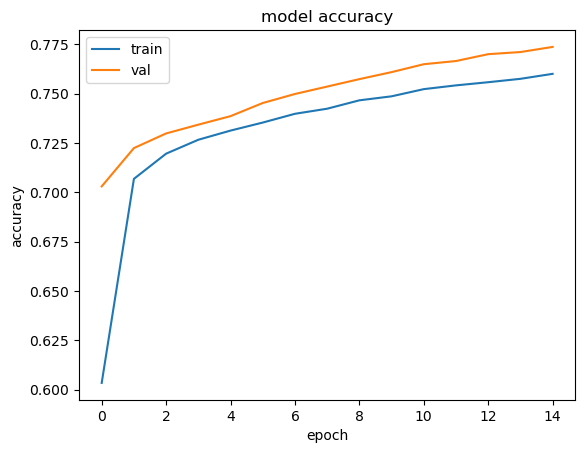

In [744]:
build_acc_plot(history)